# **Task \#2**: Machine Learning MC886/MO444
##**Classical Machine Learning Techniques**##

In [ ]:
print('Marcelo Antunes Soares Fantini' + ' RA 108341')
print('Rubens de Castro Pereira' + ' RA 217146')

## Objective:

To explore **Linear Regression** and **Logistic Regression** alternatives and come up with the best possible model for the problems, at the same time avoiding overfitting (and also underfitting). In this work, we will train a model that use medical records from patients to predict patient survival.

## Dataset

The purpose of this dataset is to predict the patients' survival from medical records. These data is available in [Google Sheets](https://docs.google.com/spreadsheets/d/18-PlYBnwD7yJoyGJOsaB5Wydc2iTG9sSnbuuV4t4efE/edit?usp=sharing), consisting in 299 patients with heart failure collected in 2015. 

**Data Dictionary**:

- **AGE**: Age of the patient (years);

- **ANAEMIA**: Decrease of red blood cells or hemoglobin (boolean);

- **HIGH BLODD PRESSURE**: If the patient has hypertension (boolean);

- **CREATININE PHOSPHOKINASE (CPK)**: Level of the CPK enzyme in the blood (mcg/L);

- **DIABETES**: If the patient has diabetes (boolean);

- **EJECTION FRACTION**: Percentage of blood leaving the heart at each contraction (percentage);

- **PLATELETS**: Platelets in the blood (kiloplatelets/mL);

- **SEX**: Woman or man (binary);

- **SERUM CREATININE**: Level of serum creatinine in the blood (mg/dL);

- **SERUM SODIUM**: Level of serum sodium in the blood (mEq/L);

- **SMOKING**: If the patient smokes or not (boolean);

- **TIME**: Follow-up period (days);

- **DEATH EVENT**: If the patient deceased during the follow-up period (boolean);

More information about the dataset: *Chicco, D., Jurman, G. Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Med Inform Decis Mak 20, 16 (2020). https://doi.org/10.1186/s12911-020-1023-5*

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

df = pd.read_csv('data/heart_dataset.csv').drop(columns=['time'])
df.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,No,582.0,No,20.0,1.0,265000.00,1.9,130.0,Female,No,1
1,55.0,No,7861.0,No,38.0,0.0,263358.03,1.1,136.0,Female,No,1
2,65.0,No,146.0,No,20.0,0.0,162000.00,1.3,129.0,Female,Yes,1
3,50.0,Yes,111.0,No,20.0,0.0,210000.00,1.9,137.0,Female,No,1
4,NaN,Yes,160.0,Yes,20.0,0.0,327000.00,2.7,116.0,Male,No,1


### Analysis


(0.5 points) This part of the assignmente aims to analyze the dataset and preprocess the data for the models. To do so, a fews things to be considered: 


*   Are there any outliers?
*   Are there missing values?
*   How will you handle categorical variables?

In [2]:
# TODO: Preprocessing Dataset.

# Missing values
print(df.isnull().sum())

age                         4
anaemia                     1
creatinine_phosphokinase    2
diabetes                    2
ejection_fraction           2
high_blood_pressure         2
platelets                   3
serum_creatinine            2
serum_sodium                1
sex                         5
smoking                     0
DEATH_EVENT                 0
dtype: int64


In [3]:
# dropping missing values
df.dropna(inplace=True)

df.describe()

,age,creatinine_phosphokinase,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,DEATH_EVENT
count,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000
mean,60.979545,581.960289,38.054152,0.364621,263354.998881,1.406751,136.646209,0.335740
std,12.079913,988.979954,11.924610,0.482195,94571.007935,1.063068,4.217514,0.473103
min,40.000000,23.000000,15.000000,0.000000,25100.000000,0.500000,113.000000,0.000000
25%,50.000000,115.000000,30.000000,0.000000,215000.000000,0.900000,134.000000,0.000000
50%,60.000000,248.000000,38.000000,0.000000,262000.000000,1.100000,137.000000,0.000000
75%,70.000000,582.000000,45.000000,1.000000,303000.000000,1.400000,140.000000,1.000000
max,95.000000,7861.000000,80.000000,1.000000,850000.000000,9.400000,146.000000,1.000000


In [4]:
# Replacing categorical variables
# anaemia: no -> 0, yes -> 1
# diabetes: no -> 0, yes -> 1
# high_blood_pressure: no-> 0, yes -> 1
# sex: male -> 0, female -> 1
# smoking: no -> 0, yes -> 1

df.replace({'No' : 0, 'Yes' : 1}, inplace=True)
df.replace({'Male' : 0, 'Female' : 1}, inplace=True)
df = df.replace({'high_blood_pressure' : {1.0 : 1, 0.0 : 0}}).astype({'high_blood_pressure' :'int64'})
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582.0,0,20.0,1,265000.00,1.9,130.0,1,0,1
1,55.0,0,7861.0,0,38.0,0,263358.03,1.1,136.0,1,0,1
2,65.0,0,146.0,0,20.0,0,162000.00,1.3,129.0,1,1,1
3,50.0,1,111.0,0,20.0,0,210000.00,1.9,137.0,1,0,1
5,90.0,1,47.0,0,40.0,1,204000.00,2.1,132.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
287,45.0,0,582.0,1,55.0,0,543000.00,1.0,132.0,0,0,0
289,90.0,1,337.0,0,38.0,0,390000.00,0.9,144.0,0,0,0
290,45.0,0,615.0,1,55.0,0,222000.00,0.8,141.0,0,0,0
293,63.0,1,103.0,1,35.0,0,179000.00,0.9,136.0,1,1,0


<AxesSubplot:>

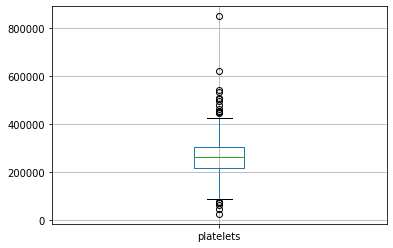

In [5]:
df.boxplot(['platelets'], figsize=(14,10))

<AxesSubplot:>

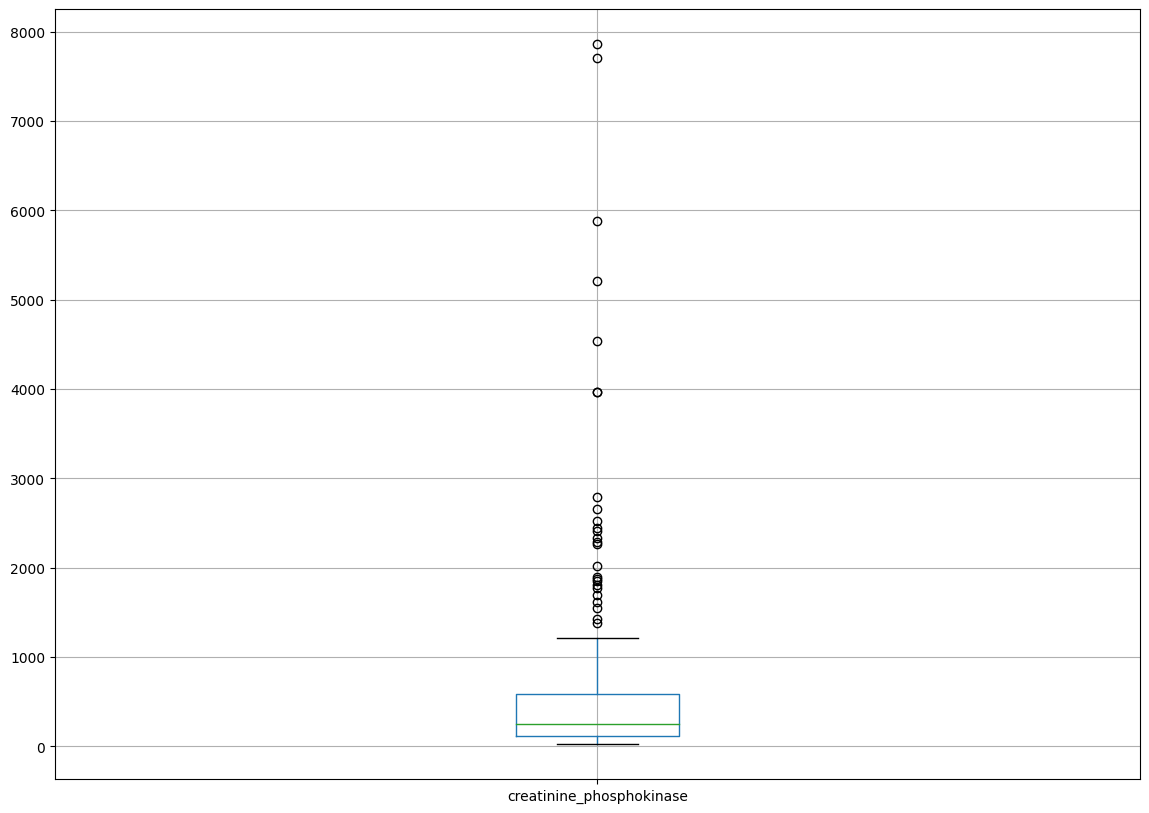

In [6]:
df.boxplot(['creatinine_phosphokinase'], figsize=(14,10))

In [11]:
Q1_platelets = np.percentile(df['platelets'], 25, method='midpoint')
Q3_platelets = np.percentile(df['platelets'], 75, method='midpoint')
IQR_platelets = Q3_platelets - Q1_platelets
upper_platelets = Q3_platelets + 1.5 * IQR_platelets
lower_platelets = Q1_platelets - 1.5 * IQR_platelets
upper_platelets_df = df[df['platelets'] > upper_platelets]
len(upper_platelets_df)

13

In [12]:
lower_platelets_df = df[df['platelets'] < lower_platelets]
len(lower_platelets_df)

6

In [13]:
Q1_creatinine = np.percentile(df['creatinine_phosphokinase'], 25, method='midpoint')
Q3_creatinine = np.percentile(df['creatinine_phosphokinase'], 75, method='midpoint')
IQR_creatinine = Q3_creatinine - Q1_creatinine
upper_creatinine = Q3_creatinine + 1.5 * IQR_creatinine
lower_creatinine = Q1_creatinine - 1.5 * IQR_creatinine
upper_creatinine_df = df[df['creatinine_phosphokinase'] > upper_creatinine]
len(upper_creatinine_df)

26

In [14]:
print(len(df))
upper_creatinine_labels = df['creatinine_phosphokinase'] > upper_creatinine
upper_platelets_labels = df['platelets'] > upper_platelets
lower_platelets_labels = df['platelets'] < lower_platelets

277


In [20]:
df.drop(df[upper_creatinine_labels].index, inplace=True)
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582.0,0,20.0,1,265000.0,1.9,130.0,1,0,1
2,65.0,0,146.0,0,20.0,0,162000.0,1.3,129.0,1,1,1
3,50.0,1,111.0,0,20.0,0,210000.0,1.9,137.0,1,0,1
5,90.0,1,47.0,0,40.0,1,204000.0,2.1,132.0,1,1,1
6,75.0,1,246.0,0,15.0,0,127000.0,1.2,137.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
286,60.0,0,253.0,0,35.0,0,279000.0,1.7,140.0,1,0,0
287,45.0,0,582.0,1,55.0,0,543000.0,1.0,132.0,0,0,0
289,90.0,1,337.0,0,38.0,0,390000.0,0.9,144.0,0,0,0
290,45.0,0,615.0,1,55.0,0,222000.0,0.8,141.0,0,0,0


In [21]:
df.drop(df[upper_platelets_labels].index, inplace=True)
df.drop(df[lower_platelets_labels].index, inplace=True)
df

C:\Users\marce\AppData\Local\Temp/ipykernel_26008/1432794107.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.drop(df[upper_platelets_labels].index, inplace=True)
C:\Users\marce\AppData\Local\Temp/ipykernel_26008/1432794107.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.drop(df[lower_platelets_labels].index, inplace=True)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582.0,0,20.0,1,265000.0,1.9,130.0,1,0,1
2,65.0,0,146.0,0,20.0,0,162000.0,1.3,129.0,1,1,1
3,50.0,1,111.0,0,20.0,0,210000.0,1.9,137.0,1,0,1
5,90.0,1,47.0,0,40.0,1,204000.0,2.1,132.0,1,1,1
6,75.0,1,246.0,0,15.0,0,127000.0,1.2,137.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
285,55.0,1,170.0,1,40.0,0,336000.0,1.2,135.0,1,0,0
286,60.0,0,253.0,0,35.0,0,279000.0,1.7,140.0,1,0,0
289,90.0,1,337.0,0,38.0,0,390000.0,0.9,144.0,0,0,0
290,45.0,0,615.0,1,55.0,0,222000.0,0.8,141.0,0,0,0


## Linear Regression

(0.75 points) This part of the assigment aims to predict the level of serum creatinine in the blod based on their medical records. 

*   Do we need to split the data into train, valid and test? How?
*   Do we need to normalize the data? How? The normalization is equal to train, valid and test split?
* **Target value: serum_creatinine**.

Obs: drop the DEATH_EVENT column.

In [22]:
# TODO: Split data and normalize. You can use scikit-learn libraries.
from sklearn.model_selection import train_test_split

In [24]:
new_df = df.drop(columns=['DEATH_EVENT'])
new_df.reset_index(inplace=True)
new_df

,index,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
0,0,75.0,0,582.0,0,20.0,1,265000.0,1.9,130.0,1,0
1,2,65.0,0,146.0,0,20.0,0,162000.0,1.3,129.0,1,1
2,3,50.0,1,111.0,0,20.0,0,210000.0,1.9,137.0,1,0
3,5,90.0,1,47.0,0,40.0,1,204000.0,2.1,132.0,1,1
4,6,75.0,1,246.0,0,15.0,0,127000.0,1.2,137.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
229,285,55.0,1,170.0,1,40.0,0,336000.0,1.2,135.0,1,0
230,286,60.0,0,253.0,0,35.0,0,279000.0,1.7,140.0,1,0
231,289,90.0,1,337.0,0,38.0,0,390000.0,0.9,144.0,0,0
232,290,45.0,0,615.0,1,55.0,0,222000.0,0.8,141.0,0,0


In [27]:
def min_max_normalization(df=None, column=None):
    df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())
    return df

In [29]:
columns = ['creatinine_phosphokinase', 'platelets', 'serum_creatinine', 'serum_sodium']
for column in columns:
    new_df = min_max_normalization(df=new_df, column=[column])
new_df

,index,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
0,0,75.0,0,0.470539,0,0.076923,1,0.523529,0.147727,0.53125,1,0
1,2,65.0,0,0.103535,0,0.076923,0,0.220588,0.079545,0.50000,1,1
2,3,50.0,1,0.074074,0,0.076923,0,0.361765,0.147727,0.75000,1,0
3,5,90.0,1,0.020202,0,0.384615,1,0.344118,0.170455,0.59375,1,1
4,6,75.0,1,0.187710,0,0.000000,0,0.117647,0.068182,0.75000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
229,285,55.0,1,0.123737,1,0.384615,0,0.732353,0.068182,0.68750,1,0
230,286,60.0,0,0.193603,0,0.307692,0,0.564706,0.125000,0.84375,1,0
231,289,90.0,1,0.264310,0,0.353846,0,0.891176,0.034091,0.96875,0,0
232,290,45.0,0,0.498316,1,0.615385,0,0.397059,0.022727,0.87500,0,0


In [39]:
new_df.drop(columns=['index'], inplace=True)
new_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
0,75.0,0,0.470539,0,0.076923,1,0.523529,0.147727,0.53125,1,0
1,65.0,0,0.103535,0,0.076923,0,0.220588,0.079545,0.50000,1,1
2,50.0,1,0.074074,0,0.076923,0,0.361765,0.147727,0.75000,1,0
3,90.0,1,0.020202,0,0.384615,1,0.344118,0.170455,0.59375,1,1
4,75.0,1,0.187710,0,0.000000,0,0.117647,0.068182,0.75000,1,0
...,...,...,...,...,...,...,...,...,...,...,...
229,55.0,1,0.123737,1,0.384615,0,0.732353,0.068182,0.68750,1,0
230,60.0,0,0.193603,0,0.307692,0,0.564706,0.125000,0.84375,1,0
231,90.0,1,0.264310,0,0.353846,0,0.891176,0.034091,0.96875,0,0
232,45.0,0,0.498316,1,0.615385,0,0.397059,0.022727,0.87500,0,0


In [42]:
X_train, X_test, y_train, y_test = train_test_split(new_df.loc[:, new_df.columns != 'serum_creatinine'], new_df[['serum_creatinine']], test_size=0.5, random_state = 42)

In [48]:
X_train

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_sodium,sex,smoking
136,66.0,1,0.041246,0,0.384615,1,0.455882,0.65625,1,0
61,69.0,0,0.470539,0,0.076923,0,0.526471,0.65625,1,1
22,70.0,0,0.083333,1,0.461538,1,0.579412,0.71875,1,1
118,62.0,0,0.217172,1,0.307692,0,0.394118,0.71875,0,0
215,68.0,1,0.112795,1,0.692308,0,0.355882,0.84375,0,0
...,...,...,...,...,...,...,...,...,...,...
106,60.0,0,0.470539,0,0.384615,0,0.382353,0.65625,1,0
14,48.0,1,0.470539,1,0.615385,0,0.000000,0.25000,0,0
92,63.0,0,0.768519,0,0.353846,0,0.638235,0.62500,1,1
179,48.0,1,0.090909,1,0.230769,1,0.461765,0.53125,0,0


### Activities

1. (0.5 points) Verify if there is any feature that has low correlation with the target variables. You can use the function [mutual_info_regression](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html) to check the importance of each feature. 

> *   Do we need all the features to predict the target value?
> *   What happens if we drop the low correlation features?

In [47]:
from sklearn.feature_selection import mutual_info_regression

# TODO: Feature selection.

mutual_info = mutual_info_regression(X_train, y_train)
mutual_info

c:\Users\marce\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([0.        , 0.        , 0.        , 0.00370263, 0.        ,
       0.02752898, 0.        , 0.12464889, 0.        , 0.06292811])

> What are the conclusions? (1-2 paragraphs)

We do not need all columns to predict the target value, since most columns aren't correlated with serum creatinine and therefore can be dropped from the analysis without loss of prediction value. The only columns with non-zero correlation are diabetes, high blood pressure, serum sodium and smoking.

2. (2.0 points) Perform Linear Regression. You should implement your solution and compare it with ```sklearn.linear_model.SGDRegressor``` (linear model fitted by minimizing a regularized empirical loss with SGD, http://scikit-learn.org).

In [53]:
# TODO: MSE Loss. You cannot use scikit-learn!!
def MSE(y, X, w):
    # convert to arrays
    y = np.asarray(y)
    X = np.asarray(X)
    w = np.asarray(w)

    # compute Xw and get number of items
    prod = np.dot(w, X)
    N = len(y)

    mse = np.sum((y - prod)**2) / N

    return mse

In [ ]:
# TODO: Linear Regression. Implement yout solution. You cannot use scikit-learn, Keras/TensorFlow, or PyTorch libraries!!
class LinearRegression():
  def __init__(self, learning_rate=-1, max_iter=-1):
    self.max_iter         = max_iter
    self.learning_rate    = learning_rate
    self.weights          = None
    self.bias             = None

  def predict(self, X):
    return None

  def fit(self, X, y):
    return None

In [ ]:
# TODO: Linear Regression. You can use scikit-learn libraries.
from sklearn.linear_model import SGDRegressor

> What are the conclusions? (1-2 paragraphs)

3. (0.5 points) Plot the cost function vs. number of epochs in the training/validation set and analyze the model. 

In [ ]:
# TODO: Plot the cost function vs. number of iterations in the training set.

> What are the conclusions? (1-2 paragraphs)

4. (0.75 points) Use different learning rates when optimizing the model. You can use the model that you implemented or the model from scikit-learn.

> If you prefer to use the SGDRegressor from scikit-learn, use the parameter ```learning_rate='constant'``` and change the ```eta0```.

In [ ]:
# TODO: Different learning rates. You can use scikit-learn libraries.

> What are the conclusions? (1-2 paragraphs)

5. (0.5 points) Sometimes, we need some more complex function to make good prediction. Evaluate a [Polynomial Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) model. 

In [ ]:
# TODO: Complex model. You can use scikit-learn libraries.

> What are the conclusions? (1-2 paragraphs)

6. (0.5 points) Pick **your best model**, based on your validation set, and predict the target values for the test set.

In [ ]:
# TODO: Plot the true label and the predict label

## Logistic Regression

This part of the assigment aims to predict the patients survival based on their medical records. 

*   Do we need to split the data into train, valid and test? How?
*   Do we need to normalize the data? How? The normalization is equal to train, valid and test split?
* **Target value: DEATH EVENT**.

1. (0.5 points) Verify if there is any feature that has low correlation with the target variables. You can use the function [mutual_info_classification](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html) to check the importance of each feature.

In [ ]:
from sklearn.feature_selection import mutual_info_classif

# TODO: Feature selection

> What are the conclusions? (1-2 paragraphs)

2. (2 points) Perform Multinomial Logistic Regression.

In [ ]:
# TODO: Logistic Regression. You can use scikit-learn libraries.

> What are the conclusions? (1-2 paragraphs)


3. (1.5 points) Another factor that can alter the model result it's if the dataset is balanced:

*   The dataset is balanced ?
*   In this case, which technique is better: *oversampling* or *undersampling*?

Obs: You can use [RandomOverSampling](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html) and [RandomUnderSampling](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html#imblearn.under_sampling.RandomUnderSampler). But you can try others techniques.

In [ ]:
# TODO: Oversampling. You can use scikit-learn and imblearn libraries.

In [ ]:
# TODO: Undersampling. You can use scikit-learn and imblearn libraries.

> What are the conclusions? (1-2 paragraphs)

4. (0.5 points) Pick **your best model** and plot the confusion matrix in the **test set**. 


In [ ]:
# TODO: Plot the confusion matrix. You can use scikit-learn, seaborn, matplotlib libraries.

> What are the conclusions? (1-2 paragraphs)

## Deadline

Wednesday, April 19, 11:59 pm. 

Penalty policy for late submission: You are not encouraged to submit your assignment after due date. However, in case you do, your grade will be penalized as follows:
- April 20, 11:59 pm : grade * 0.75
- April 21, 11:59 pm : grade * 0.5
- April 22, 11:59 pm : grade * 0.25


## Submission

On Google Classroom, submit your Jupyter Notebook (in Portuguese or English).

**This activity is NOT individual, it must be done in pairs (two-person group).**